In [1]:
import os
import pandas

In [4]:
wine_data=pandas.read_csv('../WineQT.csv')


In [5]:
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [8]:
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


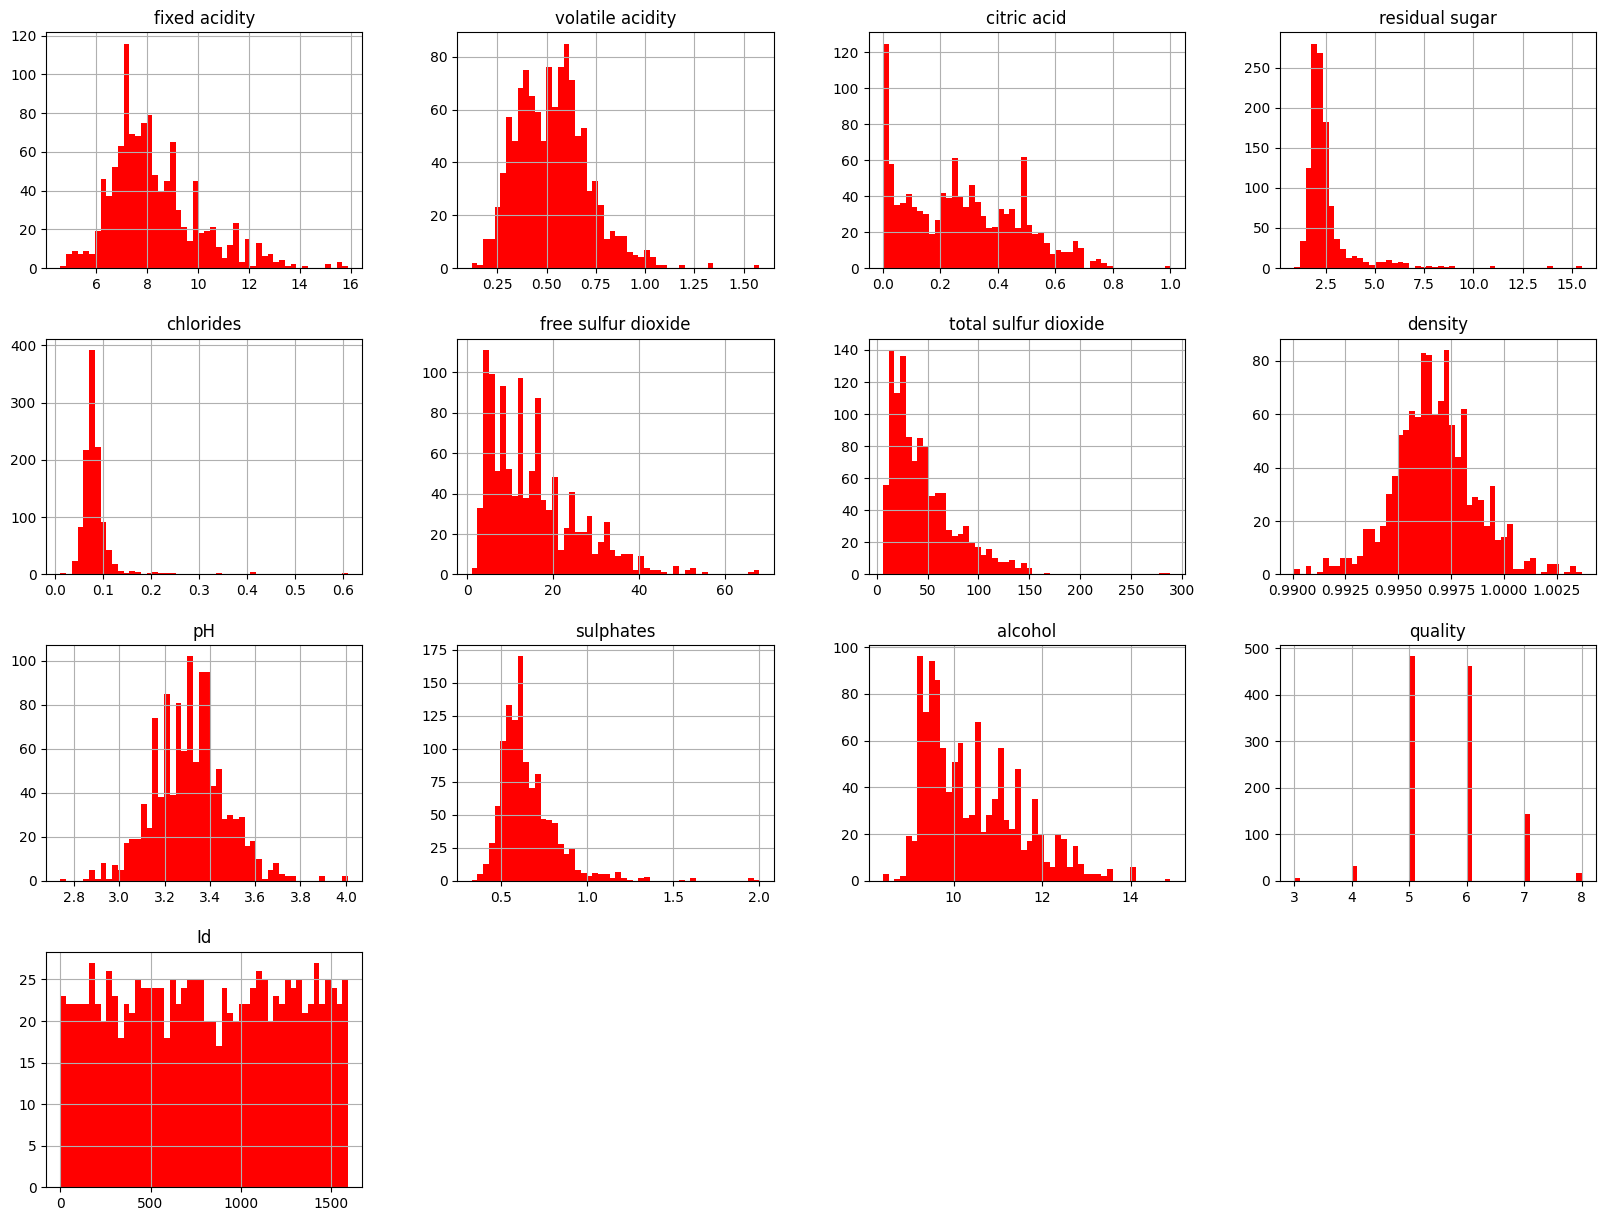

In [9]:
import matplotlib.pyplot as plt

wine_data.hist(bins=50, figsize=(20,15),color='red')
plt.show()

In [10]:
X=wine_data.drop(['quality'],axis=1)
Y=wine_data['quality']

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
lr=ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
lr.fit(X_train,y_train)

ElasticNet(alpha=0.1, random_state=42)

In [16]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import numpy as np

In [17]:
def eval_metrics(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)
    return rmse,mae,r2

In [18]:
predicted_value=lr.predict(X_test)

In [19]:
rmse,mae,r2=eval_metrics(y_test,predicted_value)

In [20]:
print("RMSE::::",rmse)
print("MAE:::::",mae)
print("R2::::::",r2)

RMSE:::: 0.629995959330732
MAE::::: 0.5034416470825984
R2:::::: 0.2867669826959264
